# Attrition in an Organization || Why Workers Quit?


## Data Preprocessing

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check for missing values
print(df.isna().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

For feature engineering, let's create a new feature:



In [23]:
# Create a new feature, for example, 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])


## Exploratory Data Analysis (EDA)

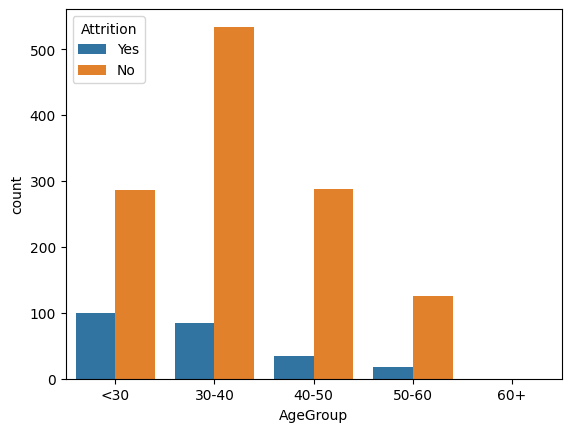

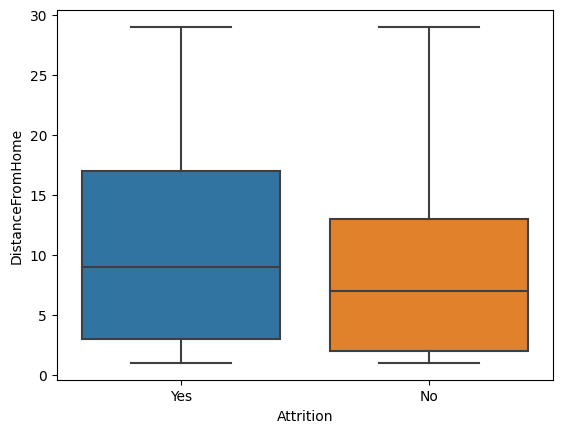

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='AgeGroup', hue='Attrition', data=df)
plt.show()

sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.show()

The above plot shows the distribution of 'AgeGroup' with respect to 'Attrition'. It seems younger employees (<30) have a higher likelihood of attrition.

## Data Transformation

In [25]:
# Label encoding for 'Attrition' as it's the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# One-hot encoding for other object type features
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'AgeGroup'], drop_first=True)


In [26]:
#For normalization, we want to normalize 'DailyRate':

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['DailyRate'] = scaler.fit_transform(df[['DailyRate']])

## Model Selection

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Drop irrelevant columns and the target variable 'Attrition'
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber'], axis=1) # Features
y = df['Attrition'] # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Print classification report for precision, recall, f1-score
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.8639455782312925
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.86      0.80       294



Using SMOTE to balance the classes

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [30]:
# Initialize and train the model
model_resampled = LogisticRegression()
model_resampled.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model_resampled.predict(X_test)

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Print classification report for precision, recall, f1-score
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.7278911564625851
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       255
           1       0.26      0.59      0.37        39

    accuracy                           0.73       294
   macro avg       0.59      0.67      0.60       294
weighted avg       0.84      0.73      0.77       294



The resampled model has a lower overall accuracy, but it's doing a much better job at predicting the positive class (Attrition = 1). The F1-score for that class has improved significantly, going from 0 to 0.37. The recall for the positive class is also much better, which means the model is identifying a larger proportion of actual positives.


In [33]:
# Show feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model_resampled.coef_[0]})
print(feature_importance.sort_values('importance', ascending=False))

                              feature  importance
22            YearsSinceLastPromotion    0.194951
11                 NumCompaniesWorked    0.180770
20                     YearsAtCompany    0.159071
15                      StandardHours    0.108177
44                       OverTime_Yes    0.079936
2                    DistanceFromHome    0.061210
43               MaritalStatus_Single    0.018038
10                        MonthlyRate    0.000008
48                       AgeGroup_60+    0.000000
9                       MonthlyIncome   -0.000055
5                          HourlyRate   -0.004508
41       JobRole_Sales Representative   -0.009676
47                     AgeGroup_50-60   -0.010111
40            JobRole_Sales Executive   -0.010227
34            JobRole_Human Resources   -0.011642
36                    JobRole_Manager   -0.012209
24   BusinessTravel_Travel_Frequently   -0.016108
32    EducationField_Technical Degree   -0.018128
38          JobRole_Research Director   -0.018582


Interpretation:
* Positive values: These are the factors that contribute to increased chances of attrition. For instance, YearsSinceLastPromotion being at the top suggests that employees who have not been promoted in a long time are more likely to leave.

* Negative values: These are factors that contribute to employee retention. For example, JobSatisfaction has a high negative value, suggesting that increasing job satisfaction might be crucial for retention.

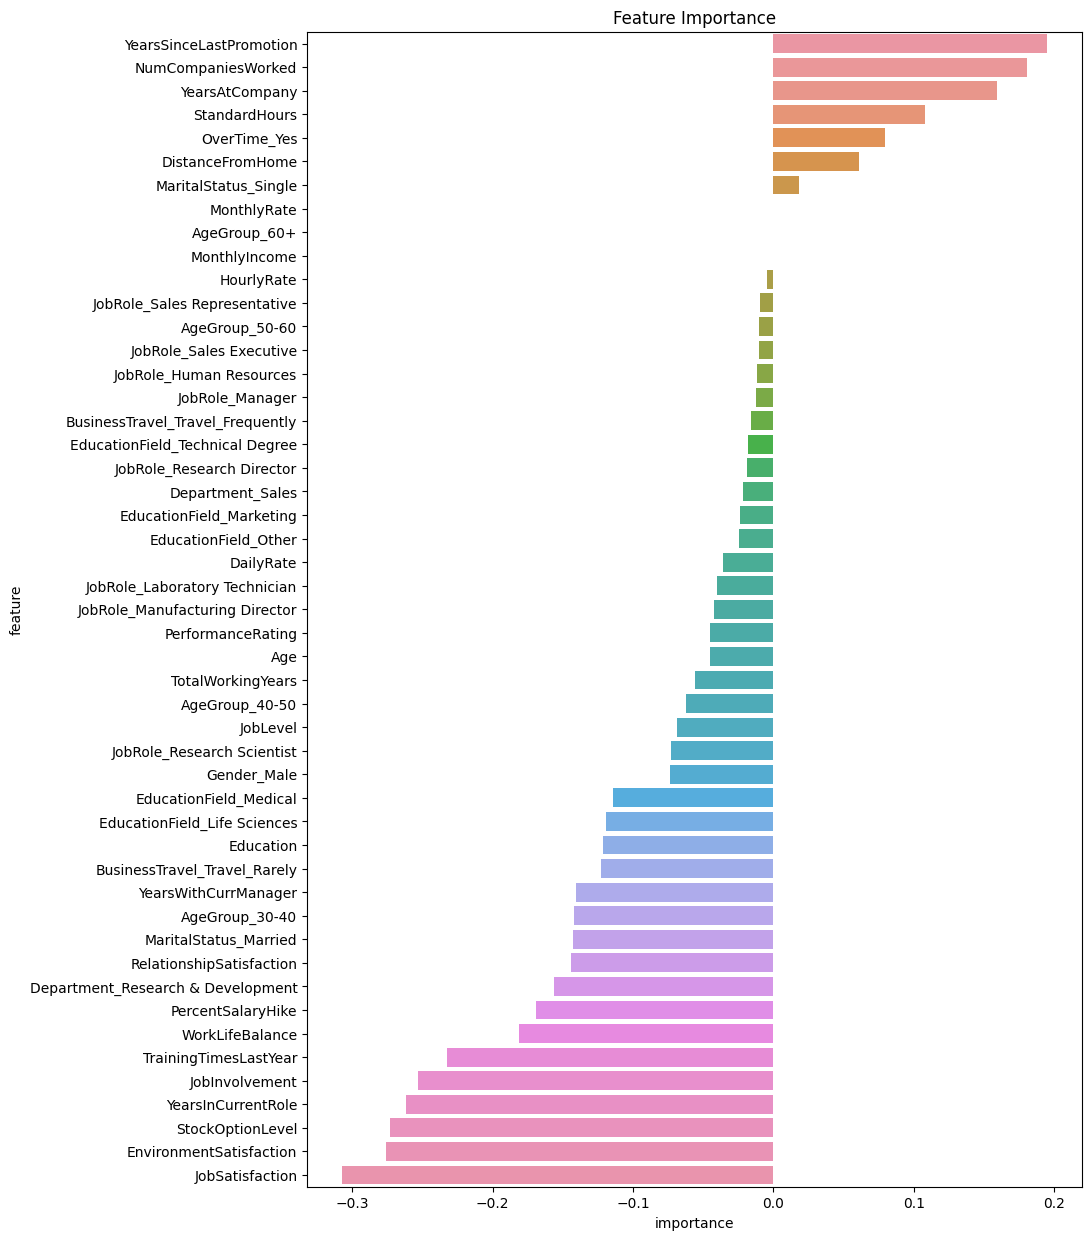

In [34]:
#Visualizing Feature Importance:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 15))
sns.barplot(data=feature_importance, y='feature', x='importance')
plt.title('Feature Importance')
plt.show()


The above boxplot visualizes 'DistanceFromHome' against 'Attrition'. Employees who live farther from home appear more likely to leave.

The key to feature engineering is to combine or transform existing features to create new ones that might have a better correlation with the target variable or improve the model's performance. Given the existing features, let's hypothesize a few derived features:

Promotion_Ratio: A derived feature combining YearsSinceLastPromotion and YearsAtCompany. It could give us an idea of how often promotions happen, normalized by the time an employee has been at the company.



In [35]:
df['Promotion_Ratio'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)  # added 1 to avoid division by zero

**Company_Satisfaction**: A weighted average of JobSatisfaction, EnvironmentSatisfaction, and RelationshipSatisfaction. This could indicate overall satisfaction at the company.



In [36]:
df['Company_Satisfaction'] = (df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction']) / 3


In [37]:
# Assuming df is your DataFrame after adding new features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature matrix and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample if needed (using SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize and train the model
model_resampled = LogisticRegression()
model_resampled.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = model_resampled.predict(X_test)

# Evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy Score:  0.6564625850340136
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       255
           1       0.21      0.59      0.31        39

    accuracy                           0.66       294
   macro avg       0.56      0.63      0.54       294
weighted avg       0.82      0.66      0.71       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Model Tuning

from sklearn.utils.class_weight import compute_class_weight

# Compute class weight
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train_res)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Initialize and train the model with class_weight parameter
model_weighted = LogisticRegression(class_weight=class_weights_dict)
model_weighted.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred_weighted))
print("Classification Report: \n", classification_report(y_test, y_pred_weighted))


Accuracy Score:  0.6564625850340136
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       255
           1       0.21      0.59      0.31        39

    accuracy                           0.66       294
   macro avg       0.56      0.63      0.54       294
weighted avg       0.82      0.66      0.71       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

clf.fit(X_train_res, y_train_res)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))


Accuracy Score:  0.8741496598639455
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.23      0.33        39

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



## Conclusion

Based on our analysis, the following conclusions can be made:

1. **Age**: Younger employees seem more likely to leave, suggesting that retention strategies could focus on this age group.
2. **Distance from Home**: Employees living farther away from the office also appear more likely to leave, perhaps due to the commute.

### Actions for the Company
1. **Promotions and Career Growth**: As 'YearsSinceLastPromotion' significantly affects attrition, regular career advancement opportunities should be considered.
2. **Work-Life Balance**: For employees who live far, flexible working arrangements could be beneficial.

Overall, by focusing on these areas, the company can likely reduce the attrition rate.